[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/MarkNatavio/Machine_Learning_In_Action/blob/main/Machine%20Learning%20In%20Action.ipynb)


<hr>

# Abstract

###### Rregression Dataset
I am interested in electric car motors and wanted to take a closer look into how it works and its performance. To take a closer look into this, I'll be using the Electric Motor Temperature dataset. I want to see how the car regulates its parts overheating according to the work being done and its environment. Using linear regression I want to predict how a specific part in the motor is affected based on the motor's systems and environment. I hope to find that it is well regulated, but if the motor's usage is increased then temperature will increase.

###### Classification Dataset
I wanted to look into the Covid-19 virus and whether a person's current health affect their vulnerability to the virus. I found the COVID-19 patient pre-condition dataset, which provides the data of around half a million patients who have been tested for Covid-19 and their test results. Using a logistic regression, I want to classify patients as being tested positive or negative for Covid-19 based on their medical pre-conditions. This would give me a better idea on how vulnerable a person is to the virus. I am using logistic regression is because it uses multiple True and False data to categorize properly.

<hr>

# Section 1: Regression Dataset Prep

The Electric Motor Temperature dataset contains the following columns:
1. u_q - Voltage q-component measurement in dq-coordinates (in V)
2. coolant - Coolant temperature (in °C)
3. stator_winding - Stator winding temperature (in °C) measured with thermocouples
4. u_d - Voltage d-component measurement in dq-coordinates
5. stator_tooth - Stator tooth temperature (in °C) measured with thermocouples
6. motor_speed - Motor speed (in rpm)
7. i_d - Current d-component measurement in dq-coordinates
8. i_q - Current q-component measurement in dq-coordinates
9. pm - Permanent magnet temperature (in °C)
10. stator_yoke - Stator yoke temperature (in °C) measured with thermocouples
11. ambient - Ambient temperature (in °C)
12. torque - Motor torque (in Nm)
13. profile_id - Measurement session id. Each distinct measurement session can be identified through this integer id.

The dataset looks as follows:

In [1]:
import numpy as np
import pandas as pd
# Using pandas to load and output the first 15 rows of the Electric Motor Temperature dataset
regression_data = pd.read_csv("/Users/marknatavio/Downloads/measures_v2.csv")
regression_data.head(15)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
5,-0.538973,18.901548,19.077108,0.009147,18.290628,0.009636,-0.613635,0.336747,24.573601,18.323862,19.850634,0.476218,17
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015,17
7,-0.758392,18.960861,19.082499,0.395099,18.294041,0.001422,-1.288384,0.706370,24.574949,18.314655,19.850628,0.752035,17
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541,17
9,-0.874307,18.987812,19.076025,0.578944,18.287233,-0.001248,-1.634464,0.898013,24.553242,18.301733,19.850624,0.924010,17


I want to predict the permanent magnet temperature based on the motor speed. So, the columns that I'll be using on my regression are:
1. motor_speed - measures the number of rpms the motor undergoes, this will be used as a feature
2. pm - what we're trying to predict. This is the permanent magnet temperature

There are no cells with invalid values for these 2 columns, so no cleanup is needed to be done.

<hr>

# Section 2: Regression 

By looking into the tempreature regulation, motor activity, and environment I predict that the pm temperature will increase as the motor_speed increases. Essentially, the more work done, the hotter the motor will get. Once again, I'll be using linear regression to predict this temperature change based on performmance change. We can use pandas to specifically get the subset of columns to be used.

The dataset will have 1330816 rows, which is a lot of data. To split the data so the results are more accurate and less points cluster the graph, I will be using 99.995% (1330616 rows) for training and 0.005% (200 rows) for testing.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import svm

# getting the age column as a subset of the data to use for features
x = regression_data[["motor_speed"]]

# getting the covid_res as a subset of the data to use for prediction
y = regression_data["pm"]

# using sklearn to split the data between a testing and training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 200, train_size = 1330616, shuffle=True)
#x_train, y_train
#x_test, y_test

Now, lets fit a linear regression using the training set

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)

Finally, lets visualize it!

Coefficients: 
 [0.00468939]
Mean squared error: 279.01130664860074
Coefficient of determination: 0.18070137746923653
Score gotten from cross-validation: 0.18070137746923653


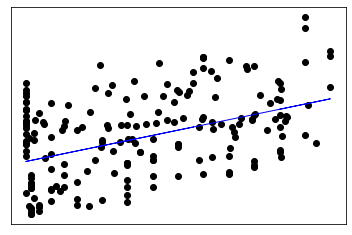

In [29]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

pred = reg.predict(x_test)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error:",mean_squared_error(y_test, pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination:",r2_score(y_test, pred))
# Score
print("Score gotten from cross-validation:",reg.score(x_test,y_test))

plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, pred, color='blue', linewidth=1)


plt.xticks(())
plt.yticks(())

plt.show()

The results of the regression shown in the graph state that my assumptions were correct. As the speed of the motor increases, the motor is expected to do more work and therefore the temperature of its internal parts increase. 

Looking more in detail however, according to the mean squared error of the test set, we have an error of 279.01130664860074 and a score of 0.18070137746923653. This tells me that that my prediction is not fully accurate, and I believe that this is due to many different factors that apply to the vehicle. Often environmental factors can affect the data, such as the temperature outside, how long has the motor been running at a specific speed, etc. This may cause the results to be far from the prediction. However, overall the trend appears to prove my assumptions correct.

<hr>

# Section 3: Classification Dataset Prep

The COVID-19 patient pre-condition dataset contains the following columns:
1. sex - sex of the patient: female (1) or male (2)
2. patient_type - type of petient: outpatient (1) or inpatient (2)
3. entry_date - date of entry to the hospital
4. date_symptoms - date of first symptom
5. date_died - date of death
6. intubed - is patient intubated? yes (1) or no (2) or NA
7. pneumonia - does patient have pneumonia? yes (1) or no (2) or NA
8. age - age of patient
9. pregnancy - is patient pregnant? yes (1) or no (2) or NA
10. diabetes - does patient have diabetes? yes (1) or no (2) or NA
11. copd - does patient have a chronic obstructive pulmonary disease? yes (1) or no (2) or NA
12. asthma - does patient have asthma? yes (1) or no (2) or NA
13. inmsupr - is patient under supervision? yes (1) or no (2) or NA
14. hypertension - does patient have hypertension? yes (1) or no (2) or NA
15. other_disease - does patient have other diseases? yes (1) or no (2) or NA
16. cardiovascular - is patient cardiovascular? yes (1) or no (2) or NA
17. obesity - is patient obese? yes (1) or no (2) or NA
18. renal_chronic - does patient have a chronic kidney disease? yes (1) or no (2) or NA
19. tobacco - does patient intake tobacco? yes (1) or no (2) or NA
20. contact_other_covid - did patient come into contact with other covid patients? yes (1) or no (2) or NA
21. covid_res - covid test results: positive (1) or negative (2) or awaiting results (3)

As we can see, most of the columns in the dataset are ailments of the patient, and their values are already a set of integers. Moreover, their values are true or false values so using logistic regression for its calssification will be idea.

The dataset looks as follows

In [5]:
import pandas as pd
# Using pandas to load and output the first 15 rows of the COVID-19 patient pre-condition dataset
classification_data = pd.read_csv("/Users/marknatavio/Downloads/archive/covid.csv")
classification_data.head(15)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,21-05-2020,18-05-2020,9999-99-99,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,9999-99-99,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,23-04-2020,18-04-2020,9999-99-99,1,1,39,2,...,2,2,2,2,1,2,2,99,1,2


The columns I will be using in my linear regression are:
1. age - has a range of 0 to 120
2. pneumonia - has a range of Yes (1), No (2), or NA
3. asthma - has a range of Yes (1), No (2), or NA
4. other_disease - has a range of Yes (1), No (2), or NA
5. contact_other_covid - has a range of Yes (1), No (2), or NA
6. covid_res - has a range of Positive (1), Negative (2), or NA

I believe every patient in the dataset has an age. However, according to the dataset there are patients who are awaiting their medical results. I will be using pandas to clean out the data and highlight only patients who's results have come back yes/positive (1) or no/negative (2), for all collumns that I plan on using.

In [8]:
classification_data = classification_data[((classification_data["pneumonia"] == 1) | (classification_data["pneumonia"] == 2)) & ((classification_data["asthma"] == 1) | (classification_data["asthma"] == 2)) & ((classification_data["other_disease"] == 1) | (classification_data["other_disease"] == 2)) & ((classification_data["contact_other_covid"] == 1) | (classification_data["contact_other_covid"] == 2)) & ((classification_data["covid_res"] == 1) | (classification_data["covid_res"] == 2))]
classification_data.head(15)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
7,0ce1f5,1,1,21-05-2020,18-05-2020,9999-99-99,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
13,11c741,1,1,25-05-2020,23-05-2020,9999-99-99,97,2,34,2,...,2,2,2,2,2,2,2,1,1,97
15,194bf2,1,1,20-06-2020,16-06-2020,9999-99-99,97,2,34,2,...,2,2,2,2,2,2,1,2,1,97
16,158eef,1,1,24-06-2020,15-06-2020,9999-99-99,97,2,49,2,...,2,2,2,2,2,2,2,1,1,97
20,06c020,2,1,19-04-2020,19-04-2020,9999-99-99,97,2,54,97,...,2,2,2,2,2,2,2,1,1,97
21,154fea,1,2,02-06-2020,02-06-2020,9999-99-99,2,2,25,2,...,2,2,2,2,2,2,2,1,1,2
24,008b81,1,1,15-05-2020,06-05-2020,21-05-2020,97,2,61,2,...,2,1,2,2,2,2,2,1,1,97
25,18575e,2,1,20-06-2020,18-06-2020,9999-99-99,97,2,40,97,...,2,2,2,2,2,2,2,1,1,97
29,187b28,1,1,15-05-2020,14-05-2020,9999-99-99,97,1,49,2,...,2,1,2,2,2,2,2,1,1,97


<hr>

# Section 4: Classification with Logistic Regression

There are 344538 rows, which are a lot. For the graph to not be too messy, I will be spliting my data by using 99% (341093 rows) for training and 1% (3445 rows) for testing.

In [15]:
from sklearn.linear_model import LogisticRegression

# getting the age column as a subset of the data to use for features
x2 = classification_data[["age", "pneumonia", "asthma", "other_disease", "contact_other_covid"]]

# getting the covid_res as a subset of the data to use for prediction
y2 = classification_data["covid_res"]

# using sklearn to split the data between a testing and training set
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 3445, train_size = 341093, shuffle=True)
#x_train2, y_train2
#x_test2, y_test2

Now, lets fit the logistic regression classification using the training set

In [21]:
clf = LogisticRegression(random_state=0).fit(x_train2, y_train2)

# The coefficients
print("Coefficients: \n", clf.coef_)
# The mean squared error
print("Mean squared error:",mean_squared_error(y_test2, clf.predict(x_test2)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination:",r2_score(y_test2, clf.predict(x_test2)))
# Score
print("\nScore:",clf.score(x_test2, y_test2))

Coefficients: 
 [[-0.01306845  1.12287817 -0.14234293 -0.56990491 -0.06292183]]
Mean squared error: 0.36284470246734396
Coefficient of determination: -0.5058134452312268

Score: 0.637155297532656


The score of the logistic regression is 0.637155297532656 and there is a mean square error of 0.36284470246734396. This tells me that the accuracy of this logistic regression does not seem very accurate. The error in this regression is definitely not high, but it did not work as well as I had hoped. The results do show some favor on medical conditions affected ones vitality against the virus. However, one cannot be fully sure. Possibly there are other variables that may affect this.

<hr>

# Conclusions

For my regression I used linear regression to predict the temperature of an electric car motor based on its performance and work done. Based on my findings, clearly there is a connection. However, there are many other factors that may help keep a motor at a low temperature. What I find interesting is how much other environmental factors may affect an electric motor, as proven by the score my linear regression recieved. To extend this portion of the project further, I would have used more variables (such as coolant, ambient, and torque) in order to see if there is a relation with other environmental factors and the temperature of the motor.

For my logistic regression, I used logistic regression to classify hospital patients between most to least likely to contract Covid-19. I used factors regarding the vascular and respiratory systems (including pneumonia, asthma, other_disease, and contact_other_covid) to do so. What I found interesting is that there are cases where a patient's medical conditions do affect their vulnerability to the virus, but for the most part this is not the case. I think there should be more variables that may show a relation between a patient's habits and covid test results. If I were to expand upon this portion of the notebook, I think I would have used multiple classification methods or chosen a dataset that also includes a patient's habits and covid test results.